### **Exercise 1**

In this exercise, you will extend a base `Animal` class to create a more specific `Dog` class. This will help you practice inheritance and method overriding in Python.

#### Task:

1. Review the provided `Animal` class.
2. Create a `Dog` class that inherits from `Animal`.
3. Override the `make_sound` method to return "Woof!" instead of the generic animal sound.
4. Add a new method called `fetch` that returns a string saying the dog's name and "fetched the ball!".

Here's the base `Animal` class to start with:

```python
class Animal:
    def __init__(self, name, species):
        self.name = name
        self.species = species
    
    def make_sound(self):
        return "Some generic animal sound"

    def describe(self):
        return f"{self.name} is a {self.species}"
```

Your task is to create the `Dog` class below this `Animal` class definition.

#### Requirements:

- The `Dog` class should inherit from `Animal`.
- The `Dog` class should have its own `__init__` method that calls the parent class's `__init__` method.
- Override the `make_sound` method to return "Woof!".
- Implement a new `fetch` method as described above.

#### Hint:

Remember to use the `super()` function to call methods from the parent class.

In [1]:
#Answer here
class Animal:
    def __init__(self, name, species):
        self.name = name
        self.species = species
    
    def make_sound(self):
        return "Some generic animal sound"

    def describe(self):
        return f"{self.name} is a {self.species}"

class Dog(Animal):
    def __init__(self, name, species):
        super().__init__(name, species="Dog")

    def make_sound(self):
        return "Woof!"
    
    def fetch(self):
        return f"{self.name} fetched the ball"
    
a = Dog("Buddy", "K9")
print(a.make_sound())
print(a.fetch())

Woof!
Buddy fetched the ball


### **Exercise 2**

In this exercise, you will create a `LogTransform` class that applies a logarithmic transformation to input data. This class should be compatible with scikit-learn's transformer interface and include an inverse transform method.

#### Task:

Create a `LogTransform` class with the following methods:
1. `__init__(self, base=np.e)`: Initialize the transformer with a logarithm base (default to natural log).
2. `fit(self, X, y=None)`: This method should just return self (as log transform doesn't need fitting).
3. `transform(self, X)`: Apply log transformation to the input data.
4. `inverse_transform(self, X)`: Reverse the log transformation.

#### Requirements:

- The class should inherit from `BaseEstimator` and `TransformerMixin` from scikit-learn.
- Handle potential errors, such as non-positive values in the input data.
- Ensure that the `transform` and `inverse_transform` methods work correctly with both 1D and 2D numpy arrays.

#### Hint:

Remember to import necessary modules (numpy, and classes from scikit-learn). Use `np.log` and `np.exp` for the transformations.

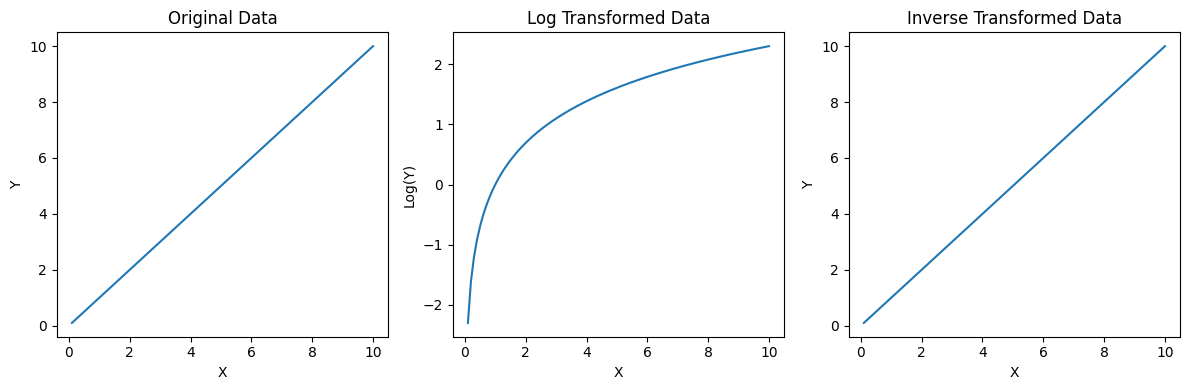

Transformation and inverse transformation verified!


In [2]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

## Implement this class
class LogTransform(BaseEstimator, TransformerMixin):
    
    def __init__(self, base=np.e):
        self.base_=base

    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        X = np.array(X)
        if np.any(X<=0):
            raise ValueError("Input contains non-positive values")
        return np.log(X)/np.log(self.base_)
    
    def inverse_transform(self,X):
        return np.power(self.base_, X)

# Test the implementation
import matplotlib.pyplot as plt

# Create some sample data
X = np.linspace(0.1, 10, 100).reshape(-1, 1)

# Initialize and use the LogTransform
log_transformer = LogTransform(base=np.e)
X_transformed = log_transformer.fit_transform(X)
X_inverse = log_transformer.inverse_transform(X_transformed)

# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(X, X)
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(132)
plt.plot(X, X_transformed)
plt.title("Log Transformed Data")
plt.xlabel("X")
plt.ylabel("Log(Y)")

plt.subplot(133)
plt.plot(X, X_inverse)
plt.title("Inverse Transformed Data")
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()

# Verify that inverse_transform reverses transform
np.testing.assert_allclose(X, X_inverse)
print("Transformation and inverse transformation verified!")

### **Exercise 3**

In this exercise, you will implement a simple gradient descent algorithm to find the minimum of a quadratic function. This will help you understand the core concepts of gradient descent before applying it to linear regression.

#### Task:

1. Implement a function `quadratic(x)` that returns the value of the quadratic function f(x) = x^2 + 2x + 1.
2. Implement a function `quadratic_derivative(x)` that returns the derivative of the quadratic function.
3. Implement a `gradient_descent` function that uses these functions to find the minimum of the quadratic function.
4. Visualize the progress of the gradient descent algorithm.

#### Requirements:

- The `gradient_descent` function should take the following parameters:
  - `start`: The starting point for x
  - `learning_rate`: The step size for each iteration
  - `num_iterations`: The number of iterations to run
  - `tolerance`: Stop if the change in x is smaller than this value
- Plot the quadratic function and show the path taken by gradient descent.
- Print the final minimum point found by the algorithm.

#### Hint:

The derivative of x^2 + 2x + 1 is 2x + 2. The update rule for gradient descent is:
x_new = x_old - learning_rate * derivative(x_old)

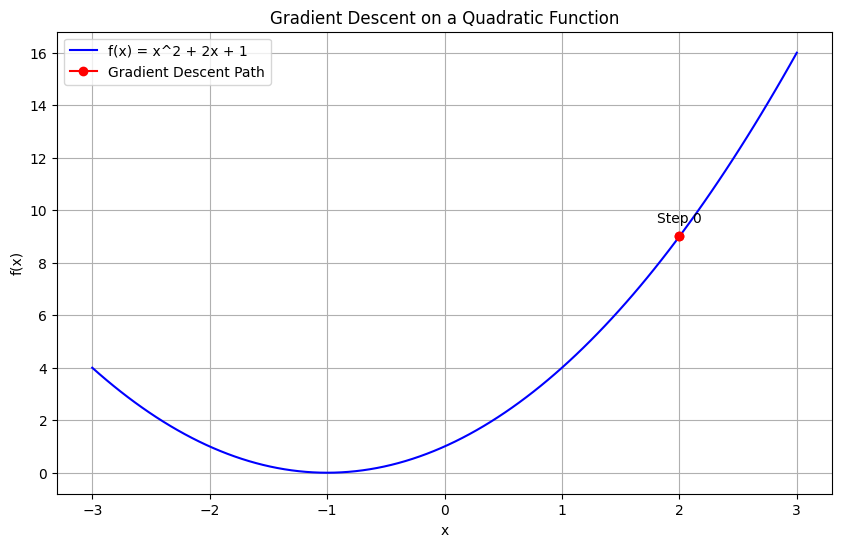

The minimum point found is x = 1.400000
The value of f(x) at this point is 5.760000


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic(x):
    return x**2+2*x+1

def quadratic_derivative(x):
    return 2*x+2

def gradient_descent(start, learning_rate, num_iterations, tolerance):
    # Should return x, x_history
    x=start
    x_history= [x]
    for i in range(num_iterations):
        grad=quadratic_derivative(x)
        new_x = x - learning_rate * grad
        if abs(new_x - x) < tolerance:
            break
        x_history.append(x)
        x = new_x
        return x, x_history

# Set parameters
start = 2.0
learning_rate = 0.1
num_iterations = 100
tolerance = 1e-6

# Run gradient descent
minimum, x_history = gradient_descent(start, learning_rate, num_iterations, tolerance)

# Prepare data for plotting
x = np.linspace(-3, 3, 100)
y = quadratic(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = x^2 + 2x + 1')
plt.plot(x_history, [quadratic(x) for x in x_history], 'ro-', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent on a Quadratic Function')
plt.legend()
plt.grid(True)

# Add annotations
for i, (x, y) in enumerate(zip(x_history, [quadratic(x) for x in x_history])):
    if i % 5 == 0:  # Annotate every 5th point to avoid clutter
        plt.annotate(f'Step {i}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

print(f"The minimum point found is x = {minimum:.6f}")
print(f"The value of f(x) at this point is {quadratic(minimum):.6f}")

### **Exercise 4**

In this exercise, you will implement a Simple Linear Regression class that is compatible with scikit-learn's estimator interface. You'll use gradient descent for optimization, as discussed in the lecture notes.

#### Task:

Create a `SimpleLinearRegression` class with the following methods:
1. `__init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6)`: Initialize the model parameters.
2. `fit(self, X, y)`: Fit the model to the training data using gradient descent.
3. `predict(self, X)`: Make predictions using the trained model.
4. `score(self, X, y)`: Calculate the coefficient of determination R^2 of the prediction.

#### Requirements:

- The class should inherit from `BaseEstimator` and `RegressorMixin` from scikit-learn.
- Use gradient descent to optimize the parameters (weight and bias).
- Store the weight as `self.coef_` and the bias as `self.intercept_` (note the trailing underscores).
- Implement early stopping in the `fit` method using the `tolerance` parameter.
- Ensure that the `fit`, `predict`, and `score` methods work with both 1D and 2D numpy arrays for X.

#### Hints:

- Remember to reshape input arrays if necessary to ensure consistent dimensions.
- The gradient descent update rules for simple linear regression are:
  - w = w - learning_rate * (1/n) * sum((y_pred - y) * x)
  - b = b - learning_rate * (1/n) * sum(y_pred - y)
- You can use `np.mean((y_true - y_pred) ** 2)` to calculate MSE for the stopping criterion.

R-squared score: 0.9374


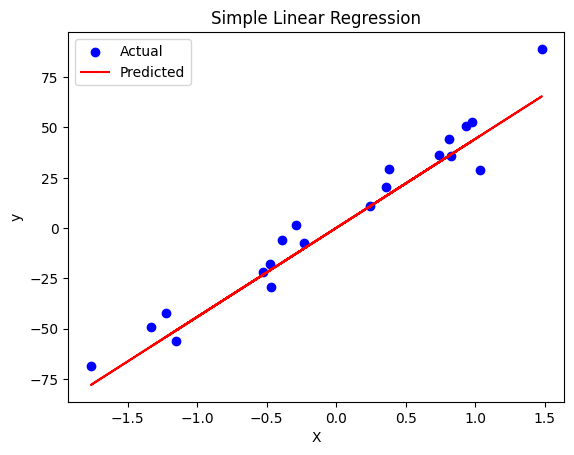

Coefficient: 44.2442
Intercept: 0.0992


In [4]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array

class SimpleLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.coef_ = 0
        self.intercept_ = 0
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)  # Validate input
        n_samples, n_features = X.shape
        
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0
        
        for _ in range(self.n_iterations):
            y_pred = self.predict(X)
            
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2 / n_samples) * np.sum(y - y_pred)
            
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db
        
        return self
    
    def predict(self, X):
        X = check_array(X)  # Validate input
        return np.dot(X, self.coef_) + self.intercept_
    
    def score(self, X, y):
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)



# Test the implementation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = SimpleLinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print R-squared score
print(f"R-squared score: {model.score(X_test, y_test):.4f}")

# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

### **Exercise 5**

In this exercise, you will extend the Simple Linear Regression implementation from Exercise 4 to create a Multiple Linear Regression class. This class will also be compatible with scikit-learn's estimator interface and use gradient descent for optimization.

#### Task:

Create a `MultipleLinearRegression` class with the following methods:
1. `__init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6)`: Initialize the model parameters.
  - the "tolerance" parameter is used as a stopping criterion for the gradient descent algorithm. It helps determine when the algorithm should stop iterating, based on how much the model parameters are changing between iterations.
  - after each iteration in gradient descent, if the absolute value of the change in coefficients is less than tolerance, we can halt the gradient descent process
2. `fit(self, X, y)`: Fit the model to the training data using gradient descent.
3. `predict(self, X)`: Make predictions using the trained model.
4. `score(self, X, y)`: Calculate the coefficient of determination R^2 of the prediction.

#### Requirements:

- The class should inherit from `BaseEstimator` and `RegressorMixin` from scikit-learn.
- Use gradient descent to optimize the parameters (weights and bias).
- Store the weights as `self.coef_` and the bias as `self.intercept_` (note the trailing underscores).
- Implement early stopping in the `fit` method using the `tolerance` parameter.
- Ensure that the `fit`, `predict`, and `score` methods work with 2D numpy arrays for X.
- Handle multiple features in the input data.

#### Hints:

- The implementation will be very similar to the Simple Linear Regression class, but you'll need to handle multiple features.
- The gradient descent update rules for multiple linear regression are:
  - w = w - learning_rate * (1/n) * X.T.dot(y_pred - y)
  - b = b - learning_rate * (1/n) * sum(y_pred - y)
- You can use `np.mean((y_true - y_pred) ** 2)` to calculate MSE for the stopping criterion.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array

class MultipleLinearRegression:
    # implement me
    pass

# Test the implementation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = MultipleLinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print R-squared score
print(f"R-squared score: {model.score(X_test, y_test):.4f}")

# Plot results (for the first feature)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('X (first feature)')
plt.ylabel('y')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

print("Coefficients:", model.coef_)
print(f"Intercept: {model.intercept_:.4f}")

# Compare with sklearn's LinearRegression
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
sk_score = sk_model.score(X_test, y_test)
print(f"sklearn LinearRegression R-squared score: {sk_score:.4f}")